# CS 1656 – Introduction to Data Science (Fall 2019) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Xiaoting Li

## Term Project 

**Released: November 20, 2019**

**Due: December 10, 2019**

In [1]:
# Your name: Eric Hunzeker
# Your github ID: erichunzeker
# Your pitt username: emh128

# grade receieved lmao: 97/100 (16% of final grade)

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikeviz.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [7]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

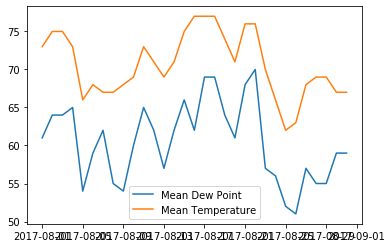

In [8]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [9]:
data = pd.concat([pd.read_csv(f) for f in glob.glob('HealthyRideRentals2019-*.csv')], ignore_index = True)

# station id | date (individual day) | fromCNT | toCNT | rebalCNT 

def getDate(x):
    x = x.split()
    date = pd.Timestamp(x[0])
    return date.date()

def getDateNotTime(x):
    return x.date()

def convert(x):
    date = pd.Timestamp(x)
    return date

def getMonth(x):
    return x.month

def getDay(x):
    return x.day

def checkRebal(x):
    check_back = x.name
    if check_back != 0: 
        prev = rebal.iloc[check_back-1]
        if x['Bikeid'] == prev['Bikeid'] and x['From station id'] != prev['To station id']:
            return True

    return False

rebal = data[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal = rebal.fillna(0)
rebal['From Date'] = rebal['Starttime'].apply(convert)
rebal = rebal.sort_values(by=['Bikeid', 'From Date'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]

rebal = rebal.reset_index(drop=True)

rebal['rebal'] = rebal.apply(checkRebal, axis=1)
# rebal.head(20)

data['From Date'] = data['Starttime'].apply(getDate)
data['To Date'] = data['Stoptime'].apply(getDate)

data_small = data[['From Date','From station id', 'Trip id', 'Bikeid', 'To station id', 'To Date']].copy()

from_data = data_small[['From Date','From station id']].copy()
from_data = from_data.copy()
to_data = data_small[['To Date', 'To station id']].copy()
to_data = to_data.copy()
rebal_data = rebal[['From Date', 'From station id', 'rebal']].copy()
rebal_data = rebal_data.copy()


from_data['Direction'] = 'fromCNT'
from_data.columns = ['Date','Station ID', 'Direction']

to_data['Direction'] = 'toCNT'
to_data.columns = ['Date','Station ID', 'Direction']

rebal_data.columns = ['Date','Station ID', 'Direction']

indexNames = rebal_data[rebal_data['Direction'] == False].index
rebal_data.drop(indexNames , inplace=True)
rebal_data['Date'] = rebal_data['Date'].apply(getDateNotTime)
rebal_data['Direction'] = 'rebalCNT'

seperated = from_data.append(to_data, ignore_index = True)
seperated = seperated.append(rebal_data, ignore_index = True)

seperated = seperated.sort_values('Station ID')

indexNames = seperated[seperated['Station ID'] == 0].index
seperated.drop(indexNames , inplace=True)

cross = pd.crosstab(seperated["Date"], [seperated["Station ID"], seperated['Direction']],dropna=False, margins=False, colnames=['Station ID', 'Metric'])
cross = cross.sort_values('Date')

# this will take a little under a minute to run***

cross.head(20)


Station ID 666.0                  1000.0                 1001.0            \
Metric     fromCNT rebalCNT toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                                                                        
2019-01-01       0        0     0       4        0     4       0        0   
2019-01-02       0        0     0       2        0     0       1        0   
2019-01-03       0        0     0       0        0     3       4        0   
2019-01-04       0        0     0       2        0     1       2        0   
2019-01-05       0        0     0       5        0     5       5        0   
2019-01-06       0        0     0       1        0     2       2        0   
2019-01-07       0        0     0       2        0     2       3        0   
2019-01-08       0        0     0       2        0     0       6        0   
2019-01-09       0        0     0       2        0     1       5        0   
2019-01-10       0        0     0       1        0     1       2        0   
2019-01-11       0        0     0       1        0     0       0        0   
2019-01-12       0        0     0       0        0     2       1        0   
2019-01-13       0        0     0       0        0     1       0        0   
2019-01-14       0        0     0       0        0     1       2        0   
2019-01-15       0        0     0       3        0     6       3        0   
2019-01-16       0        0     0       1        0     0       4        0   
2019-01-17       0        0     0       0        0     3       2        0   
2019-01-18       0        0     0       2        0     0       2        0   
2019-01-19       0        0     0       3        0     1       0        0   
2019-01-20       0        0     0       0        0     0       0        0   

Station ID       1002.0   ... 49881.0 49921.0                49951.0           \
Metric     toCNT fromCNT  ...   toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                      ...                                                   
2019-01-01     0       1  ...       0       0        0     0       0        0   
2019-01-02     4       0  ...       0       0        0     0       1        0   
2019-01-03    10       1  ...       0       0        0     0       0        0   
2019-01-04     4       0  ...       0       0        0     0       0        0   
2019-01-05     2       3  ...       0       0        0     0       0        0   
2019-01-06     2       1  ...       0       0        0     0       0        0   
2019-01-07     3       0  ...       0       0        0     0       0        0   
2019-01-08     7       1  ...       0       0        0     0       0        0   
2019-01-09     3       2  ...       0       0        0     0       0        0   
2019-01-10     3       2  ...       0       0        0     0       0        0   
2019-01-11     2       0  ...       0       0        0     0       1        0   
2019-01-12     2       1  ...       0       0        0     0       0        0   
2019-01-13     0       0  ...       0       0        0     0       0        0   
2019-01-14     2       3  ...       0       0        0     0       0        0   
2019-01-15     3       3  ...       0       0        0     0       2        2   
2019-01-16     4       3  ...       0       0        0     0       0        0   
2019-01-17     2       3  ...       0       0        0     0       0        0   
2019-01-18     2       2  ...       0       0        0     0       0        0   
2019-01-19     2       1  ...       0       0        0     0       1        1   
2019-01-20     0       0  ...       0       0        0     0       0        0   

Station ID       90097.0                 
Metric     toCNT fromCNT rebalCNT toCNT  
Date                                     
2019-01-01     0       0        0     0  
2019-01-02     0       0        0     0  
2019-01-03     0       0        0     0  
2019-01-04     1       0        0     0  
2019-01-05     0       0        0     0  
2019-01-06     0       0    

### Task 1.2

In [10]:
monthly = seperated.copy()
monthly['Date'] = monthly['Date'].apply(getMonth)
monthly = pd.crosstab(monthly["Date"], [monthly["Station ID"], monthly['Direction']],dropna=False, margins=False, colnames=['Station ID', 'Metric'])

monthly.head(20)

Station ID 666.0                  1000.0                 1001.0            \
Metric     fromCNT rebalCNT toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                                                                        
1                0        0     0      35        1    43      59        1   
2                0        0     0      51       11    58      61        4   
3                0        0     0     132       11   174     117       14   
4                0        0     0     392       11   426     276       19   
5                0        0     0     601       37   659     429       15   
6                0        0     0     666       43   722     498       37   
7                1        1     0     672       31   692     552       76   
8                2        2     0     586       19   640     470       10   
9                0        0     0     522       21   563     415       20   
10               0        0     0       0        0     2       0        0   

Station ID       1002.0   ... 49881.0 49921.0                49951.0           \
Metric     toCNT fromCNT  ...   toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                      ...                                                   
1             82      36  ...       0       0        0     0       5        3   
2             80      51  ...       0       6        4     3       7        1   
3            134      51  ...      12      21        5    15      19        5   
4            330      89  ...      26      31        8    27      59       17   
5            502     166  ...      36      63       14    58      92       17   
6            522     110  ...      53      49       17    35      84       26   
7            602     181  ...      42     101       21   104      92       10   
8            539     188  ...      38     107       25    96     133        9   
9            465     167  ...      43     106       14   114     118        8   
10             0       0  ...       0       0        0     0       0        0   

Station ID       90097.0                 
Metric     toCNT fromCNT rebalCNT toCNT  
Date                                     
1              7       0        0     0  
2              7       0        0     0  
3             22       0        0     0  
4             55       0        0     0  
5             94       0        0     0  
6             65       0        0     0  
7            100       2        0     2  
8            143       0        0     0  
9            132       0        0     0  
10             2       0        0     0  

[10 rows x 357 columns]

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [11]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 1
filter_stationID = 1093
num_to_month = {1:['January', 31], 2:['February', 28], 3:['March', 31], 4:['April', 30], 
                5:['May', 31], 6:['June', 30], 7:['July', 31], 8:['August', 31], 9:['September', 30], 
                10:['October', 31], 11:['November', 30], 12:['December', 31]}



### Task 2.1

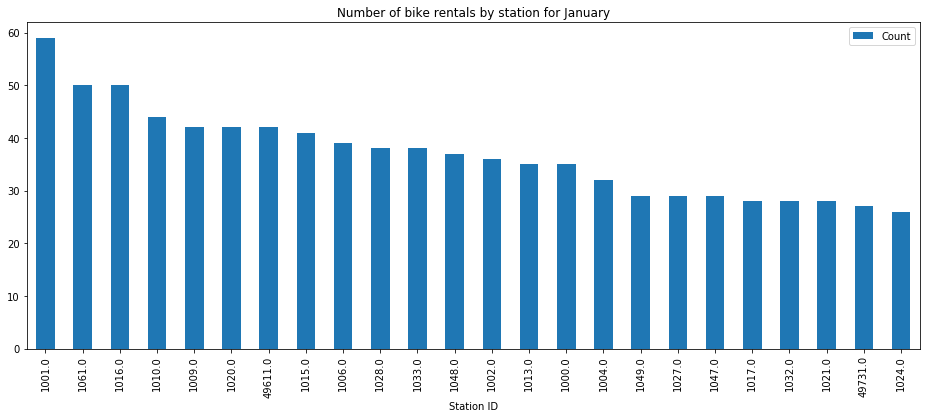

In [12]:
from_month = data_small[['From Date','From station id']].copy()
from_month = from_month.copy()

from_month.columns = ['Date','Station ID']
from_month = from_month.sort_values('Station ID')
indexNames = from_month[from_month['Station ID'] == 0].index
from_month.drop(indexNames , inplace=True)


from_month['Date'] = from_month['Date'].apply(getMonth)

from_month = from_month.loc[from_month['Date'] == filter_month]
from_month = from_month['Station ID'].groupby([from_month['Station ID']]).count()
from_month = from_month.sort_values(ascending=False)
keys = from_month.keys()
counts = from_month.tolist()


df = pd.DataFrame({'Station ID':keys[0:24], 'Count':counts[0:24]})
ti = 'Number of bike rentals by station for ' + num_to_month[filter_month][0]
ax = df.plot.bar(x='Station ID', y='Count', title=ti, figsize=(16,6))


### Task 2.2

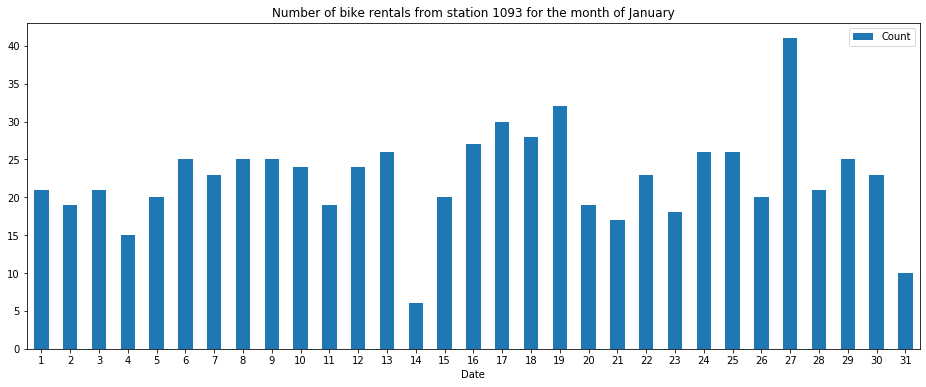

In [13]:
from_station = data_small[['From Date','From station id']].copy()
from_station = from_station.copy()

from_station.columns = ['Date','Station ID']
from_station['Date'] = from_station['Date'].apply(getDay)
from_station = from_station.sort_values('Date')

from_station = from_station.loc[from_station['Station ID'] == filter_stationID]
from_station = from_station['Date'].groupby([from_station['Date']]).count()
keys = from_station.keys()
counts = from_station.tolist()


for i in range(1, num_to_month[filter_month][1] + 1):
    if i not in keys:
        keys = keys.insert(i - 1, i)
        counts.insert(i - 1, 0)

df = pd.DataFrame({'Date':keys, 'Count':counts})
ti = 'Number of bike rentals from station ' + str(filter_stationID) + ' for the month of ' + num_to_month[filter_month][0]
ax = df.plot.bar(x='Date', y='Count', rot=0, title=ti, figsize=(16,6))


### Task 2.3

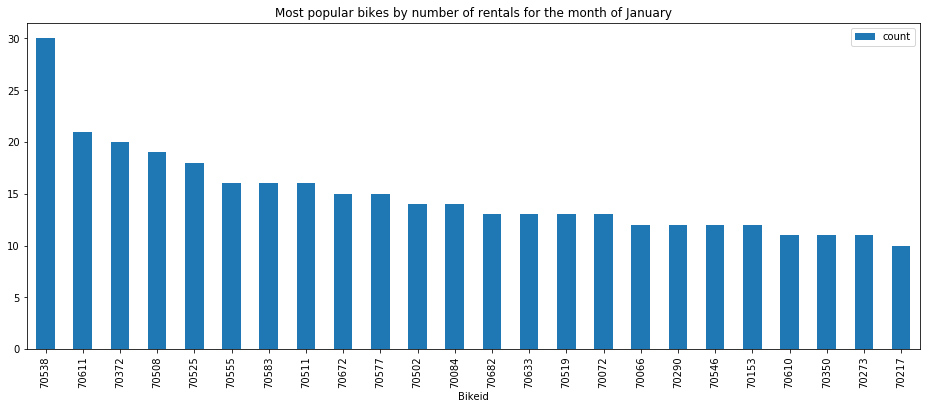

In [14]:
bike_count = data_small[['From Date','Bikeid']].copy()
bike_count = bike_count.copy()

bike_count.columns = ['Date','Bikeid']
# bike_count['Date'] = bike_count['Date'].apply(getDay)
bike_count['Date'] = bike_count['Date'].apply(getMonth)

bike_count = bike_count.loc[bike_count['Date'] == filter_month]
bike_count = bike_count.groupby(['Bikeid'])['Bikeid'].count()
bike_count = bike_count.sort_values(ascending=False)

keys = bike_count.keys()
counts = bike_count.tolist()

df = pd.DataFrame({'Bikeid':keys[0:24], 'count':counts[0:24]})
ti = 'Most popular bikes by number of rentals for the month of ' + num_to_month[filter_month][0]
ax = df.plot.bar(x='Bikeid', y='count', title=ti, figsize=(16,6))

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

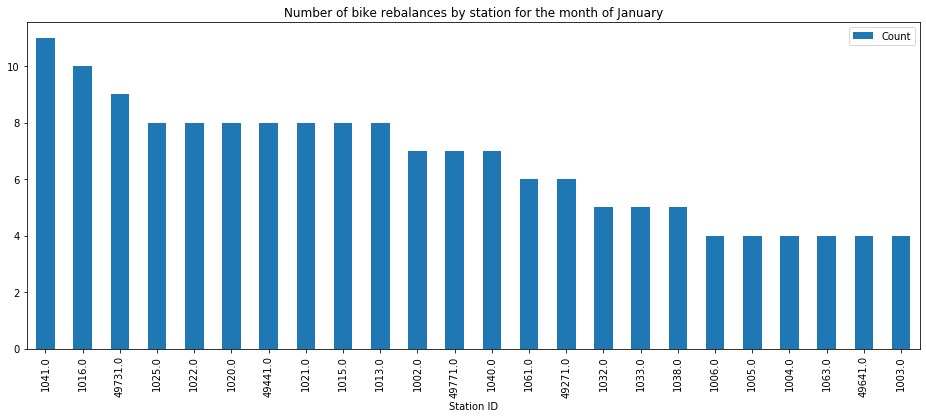

In [15]:
rebal_month = rebal[['From Date', 'From station id', 'rebal']].copy()
rebal_month = rebal_month.copy()

inames = rebal_month[rebal_month['rebal'] == False].index
rebal_month.drop(inames , inplace=True)
rebal_month['From Date'] = rebal_month['From Date'].apply(getDateNotTime)

rebal_month = rebal_month.drop(['rebal'], axis=1)

rebal_month.columns = ['Date','Station ID']
rebal_month = rebal_month.sort_values('Station ID')

indexNames = rebal_month[rebal_month['Station ID'] == 0].index
rebal_month.drop(indexNames , inplace=True)

rebal_month['Date'] = rebal_month['Date'].apply(getMonth)

rebal_month = rebal_month.loc[rebal_month['Date'] == filter_month]
rebal_month = rebal_month['Station ID'].groupby([rebal_month['Station ID']]).count()
rebal_month = rebal_month.sort_values(ascending=False)
keys = rebal_month.keys()
counts = rebal_month.tolist()

df = pd.DataFrame({'Station ID':keys[0:24], 'Count':counts[0:24]})
ti = 'Number of bike rebalances by station for the month of ' + num_to_month[filter_month][0]
ax = df.plot.bar(x='Station ID', y='Count', title=ti, figsize=(16,6))

### Task 3.2

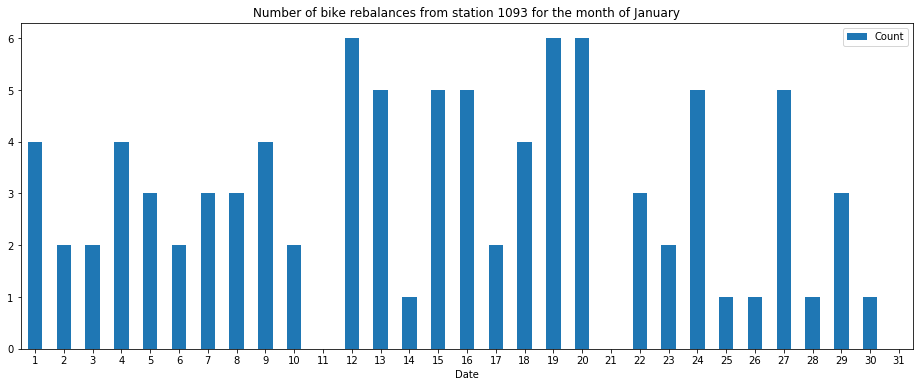

In [16]:

rebal_station = rebal[['From Date', 'From station id', 'rebal']].copy()
rebal_station = rebal_station.copy()

inames = rebal_station[rebal_station['rebal'] == False].index
rebal_station.drop(inames , inplace=True)
rebal_station['From Date'] = rebal_station['From Date'].apply(getDateNotTime)

rebal_station = rebal_station.drop(['rebal'], axis=1)

rebal_station.columns = ['Date','Station ID']
rebal_station['Date'] = rebal_station['Date'].apply(getDay)
rebal_station = rebal_station.sort_values('Date')

rebal_station = rebal_station.loc[rebal_station['Station ID'] == filter_stationID]
rebal_station = rebal_station['Date'].groupby([rebal_station['Date']]).count()
keys = rebal_station.keys()
counts = rebal_station.tolist()

for i in range(1, num_to_month[filter_month][1] + 1):
    if i not in keys:
        keys = keys.insert(i - 1, i)
        counts.insert(i - 1, 0)

df = pd.DataFrame({'Date':keys, 'Count':counts})
ti = 'Number of bike rebalances from station ' + str(filter_stationID) + ' for the month of '  + num_to_month[filter_month][0]
ax = df.plot.bar(x='Date', y='Count', rot=0, title=ti, figsize=(16,6))

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

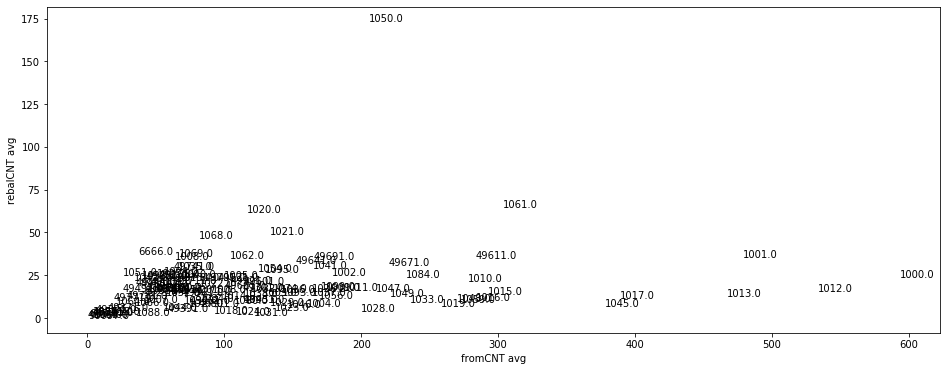

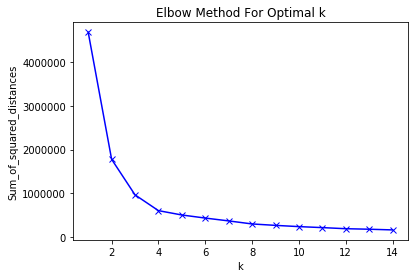

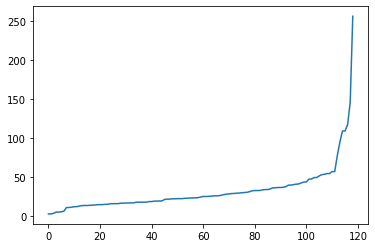

In [18]:
# Perform clustering on the above 6-dimensional space 
# using K-means (with at least 3 different values for K) and 
# DBSCAN (with at least three different value combinations for min_samples and eps)

from sklearn.cluster import KMeans, DBSCAN
import numpy as np

six_dim = monthly.copy()
six_dim = six_dim.copy()
six_dim = six_dim.loc[7:9]

six_dim = six_dim.T
six_dim = six_dim.unstack()

six_dim.columns = six_dim.columns.droplevel()
six_dim = six_dim.drop(['toCNT'], axis=1)

six_dim.columns = ['fromCNT7', 'rebalCNT7', 'fromCNT8', 'rebalCNT8', 'fromCNT9', 'rebalCNT9']
six_dim = six_dim[['fromCNT7', 'fromCNT8', 'fromCNT9', 'rebalCNT7', 'rebalCNT8', 'rebalCNT9']]

labels1 = labels2 = labels3 = labels4 = labels5 = labels6 = ""

cluster_params = [2, 3, 4, [55, 12], [60, 14], [70, 7]]
labels = [labels1, labels2, labels3, labels4, labels5, labels6]

for i in range (0, 3):
    kmeans = KMeans(n_clusters=cluster_params[i], init='k-means++', random_state=5000).fit(six_dim)
    labels[i] = kmeans.labels_
    dbscan = DBSCAN(eps=cluster_params[i + 3][0], min_samples=cluster_params[i + 3][1]).fit(six_dim)
    labels[i + 3] = dbscan.labels_

    
## -- UNCOMMENT TO SHOW CLUSTERS ON SCATTER PLOT --

fig = plt.figure(figsize=(16,6))
plt.scatter(six_dim[['fromCNT7', 'fromCNT8', 'fromCNT9']].mean(axis=1),
            six_dim[['rebalCNT7', 'rebalCNT8', 'rebalCNT9']].mean(axis=1),60,\
            c=labels3, alpha = 0.6)
plt.xlabel('fromCNT avg')
plt.ylabel('rebalCNT avg')

[plt.text(((row.fromCNT7 + row.fromCNT8 + row.fromCNT9)/3), 
 ((row.rebalCNT7 + row.rebalCNT8 + row.rebalCNT9)/3), row.Index) for row in six_dim.itertuples()]
plt.show()

## -- UNCOMMENT TO SHOW CLUSTERS ON SCATTER PLOT --



## -- UNCOMMENT TO SHOW ELBOW GRAPH (DECIDING OPTIMAL K VALUE) --

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=5000)
    km = km.fit(six_dim)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## -- UNCOMMENT TO SHOW ELBOW GRAPH (DECIDING OPTIMAL K VALUE) --


## -- UNCOMMENT TO SHOW K-DISTANCE GRAPH (DECIDING OPTIMAL EPSILON VALUE) --

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(six_dim)
distances, indices = nbrs.kneighbors(six_dim)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## -- UNCOMMENT TO SHOW K-DISTANCE GRAPH (DECIDING OPTIMAL EPSILON VALUE) --


## -- SOURCES FOR LAST TWO GRAPHS
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc


### Task 4.2

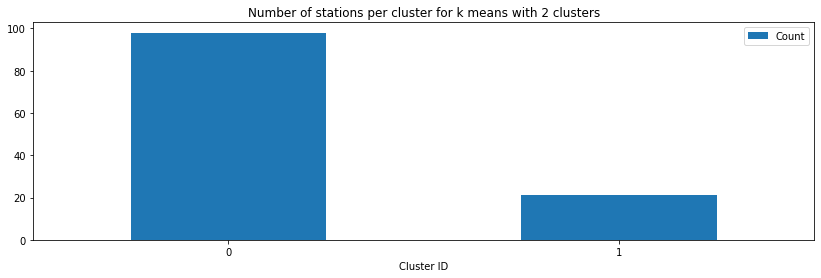

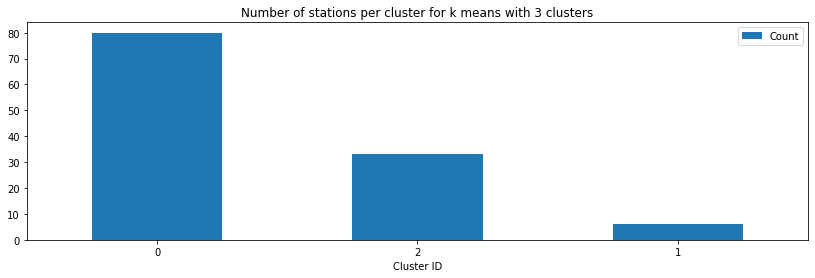

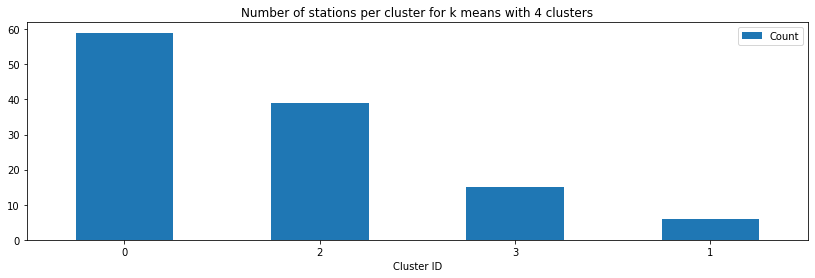

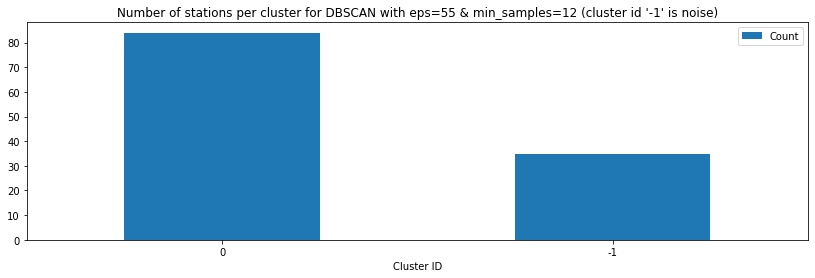

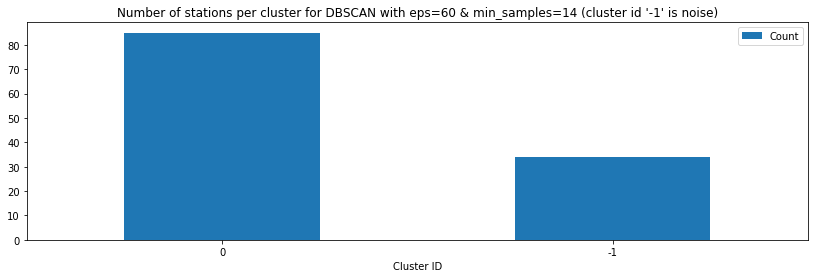

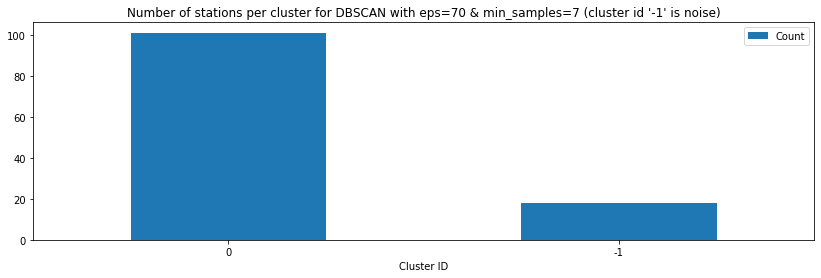

In [19]:
for i in range (0, 6):
    unique_i, counts_i = np.unique(labels[i], return_counts=True)
    vals = sorted(list(zip(unique_i, counts_i)), key = lambda x: x[1], reverse=True)
    df = pd.DataFrame({'Cluster ID':[x[0] for x in vals], 'Count':[x[1] for x in vals]})
    if i < 3:
        ti = 'Number of stations per cluster for k means with ' + str(cluster_params[i]) + ' clusters'
    else:
        ti = 'Number of stations per cluster for DBSCAN with eps=' + str(cluster_params[i][0]) + ' & min_samples=' + str(cluster_params[i][1]) + ' (cluster id \'-1\' is noise)'
    ax = df.plot.bar(x='Cluster ID', y='Count', rot=0, title=ti, figsize=(14,4))


### Task 4.3

- K means clustering seems to better in this case because the majority of the data points are very close together, then another decent portion are spread out very sparsely. K Means gives more control in the degree of classification, whereas DBSCAN is hard to get good results outside of 2 clusters.

-----------------------

* (a) What is the best value of K?
    - The best value for K is 4. By using the [elbow method](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f), we can find ["the point after which the distortion/inertia start decreasing in a linear fashion"](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/). This will be the best value to use because while increasing the number of clusters after 4, distortion and inertia will experience diminishing returns. Therefor, 4 clusters can accurately describe and classify the data points without overly seperating the data. For DBSCAN, I chose an epsilon of 55, and min samples of 12. To figure this out, I created a k-distance graph, and looked for the epsilon value before the points sorted by distances sharply increase. To pick min samples, I doubled the dimensionality of the model.
        

* (b) What is the best algorithm out of the two* that you tried?
    - K means - because you don't have to worry about similar data clusters bleeding into each other . K Means gives you more control on how strictly you'd like to classify your data. Though K means is more sensitive to outliers, this can be useful in this case. For k means with 4 clusters, a very sparse part of the data is captured - where < 10 stations have a very high fromCNT, but fairly regular rebalCNT. In DBSCAN, these points would be considered noise,  however, these points are essential in looking at maximum departed stations.